In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("EBITDA_new.csv")
df

,ticker,fiscalQuarter,commonSharesOutstanding_,commonSharesTraded_,capitalExpenditure_,netIncome_,operatingIncome_,shareholdersEquity_,totalAssets_,EPS_,...,salePrice,realGDPSA,m2SA,m2m1GrowthGap,m2Velocity,primeRate,revenue_,EBITDA_lag1,year,quarter
0,0,2013Q1,-0.000933,12.247579,0.000000,-0.073272,-0.095742,-0.003005,0.00000,0.00,...,13.564960,-0.867729,9.261987,0.172473,1.581,3.250000,-0.00300,NaN,2013,1
1,0,2013Q2,-0.000933,12.247579,0.000000,-0.073210,-0.095754,-0.003005,0.00000,0.00,...,13.651304,-0.849252,9.272702,-0.640550,1.572,3.250000,-0.00300,50.369,2013,2
2,0,2013Q3,-0.000933,12.247579,0.000000,-0.073519,-0.095692,-0.003005,0.00000,0.00,...,13.650265,-0.790315,9.286502,-0.328302,1.571,3.250000,-0.00300,42.617,2013,3
3,0,2013Q4,-0.000933,12.247579,0.000000,-0.072407,-0.095729,0.000000,0.00000,0.00,...,13.978878,-0.729457,9.305890,-1.494308,1.563,3.250000,0.00000,46.147,2013,4
4,0,2014Q1,-0.000933,12.247579,0.000000,-0.073519,-0.095692,-0.006018,0.00000,0.00,...,13.796973,-0.753759,9.321372,-1.579023,1.539,3.250000,-0.00600,67.587,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,11,2022Q4,1.116244,14.488942,3.970292,2.422222,2.417428,NaN,4848.35925,1.12,...,14.303885,0.925248,9.968103,1.365277,1.253,6.819672,-904.00000,137.428,2022,4
535,11,2023Q1,1.077239,14.488942,2.564949,2.422222,2.417428,NaN,4848.35925,0.81,...,14.193683,0.985434,9.956538,1.945551,1.288,7.693548,-943.29475,177.311,2023,1
536,11,2023Q2,1.037409,14.488942,3.367296,2.422222,2.417428,NaN,4848.35925,1.25,...,14.029054,1.038587,9.941376,2.367239,1.322,8.158730,-943.29475,95.775,2023,2
537,11,2023Q3,1.009074,14.488942,3.761200,2.422222,2.417428,NaN,4848.35925,1.49,...,14.013110,1.132989,9.940176,1.509829,1.348,8.432540,-943.29475,149.372,2023,3


In [3]:
df.dropna(inplace=True)
df.drop

<bound method DataFrame.drop of      ticker fiscalQuarter  commonSharesOutstanding_  commonSharesTraded_  \
1         0        2013Q2                 -0.000933            12.247579   
2         0        2013Q3                 -0.000933            12.247579   
3         0        2013Q4                 -0.000933            12.247579   
4         0        2014Q1                 -0.000933            12.247579   
5         0        2014Q2                 -0.007586            12.247579   
..      ...           ...                       ...                  ...   
511      11        2017Q1                  1.579732            14.488942   
512      11        2017Q2                  1.552312            14.488942   
513      11        2017Q3                  1.525752            14.488942   
514      11        2017Q4                  1.502044            14.488942   
515      11        2018Q1                  1.498529            14.488942   

     capitalExpenditure_  netIncome_  operatingIncome_ 

In [4]:
train = df[df['year'] < 2021]
test = df[df['year'] >= 2021]

In [5]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# use lag1 as predicted value
y_true_train = train["EBITDA"]
y_pred_train = train["EBITDA_lag1"]

y_true_test = test["EBITDA"]
y_pred_test = test["EBITDA_lag1"]

def calculatePerformance(y_true, y_pred):
    # Compute RMSE, R-Squared, and MPAE for each target column
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse**0.5
    r_squared = r2_score(y_true, y_pred)
    mpae = mean_absolute_percentage_error(y_true, y_pred)

    performance_metrics = {'MSE': mse, 'RMSE': rmse, 'R-Squared': r_squared, 'MPAE': mpae}
    # Convert results to DataFrame for better visualization
    performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')
    return performance_df

performan_train = calculatePerformance(y_true_train, y_pred_train)
performan_test = calculatePerformance(y_true_test, y_pred_test)

print("performance on training set\n", performan_train)
print("\n")
print("performance on testing set\n", performan_test)

performance on training set
                     0
MSE        389.118776
RMSE        19.726094
R-Squared    0.931669
MPAE       116.172742


performance on testing set
                     0
MSE        300.531013
RMSE        17.335830
R-Squared    0.953478
MPAE         0.889287


##### OLS

In [6]:
# train-test-split

# drop non-numerical columns
train = train.drop(columns=['fiscalQuarter'])
test = test.drop(columns=['fiscalQuarter'])

# split X and y
X_train = train.drop(columns=['EBITDA']) 
y_train = train['EBITDA'] 

X_test = test.drop(columns=['EBITDA'])  
y_test = test['EBITDA']

In [7]:
# process the input features

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# scale X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)       

# use PCA to reduce correlation
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)  
X_test_pca = pca.transform(X_test_scaled)   

# check component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio of each principal component:\n", explained_variance)

# keep main component(accumulated variance > 90%)
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.90) + 1 
print(f"Number of principal components chosen: {n_components}")

X_train_pca = X_train_pca[:, :n_components]
X_test_pca = X_test_pca[:, :n_components]

Explained Variance Ratio of each principal component:
 [2.54518542e-01 1.63674826e-01 1.06550736e-01 7.05601278e-02
 6.29309842e-02 5.15086074e-02 4.85188369e-02 4.05399111e-02
 3.58661199e-02 2.87087449e-02 2.66312746e-02 2.18222080e-02
 1.87714519e-02 1.53334318e-02 1.36427625e-02 1.18979892e-02
 9.12956422e-03 4.70788459e-03 4.39991039e-03 3.36261750e-03
 3.08579281e-03 1.24629829e-03 1.08874741e-03 7.90949444e-04
 5.76699990e-04 8.42266677e-05 3.54793412e-05 1.52760624e-05]
Number of principal components chosen: 12


In [8]:
import statsmodels.api as sm
'''
# add bias
X_train = sm.add_constant(X_train)  
X_test = sm.add_constant(X_test)  

# build OLS
ols_model = sm.OLS(y_train, X_train).fit() 

# predtction
y_pred_train_ols = ols_model.predict(X_train) 
y_pred_test_ols = ols_model.predict(X_test) 
'''

# add bias
X_train_pca_with_const = sm.add_constant(X_train_pca)  
X_test_pca_with_const = sm.add_constant(X_test_pca)  

# build OLS
ols_model = sm.OLS(y_train, X_train_pca_with_const).fit() 

# predtction
y_pred_train_ols = ols_model.predict(X_train_pca_with_const)  
y_pred_test_ols = ols_model.predict(X_test_pca_with_const)  

# caluculate performance matrix
performan_train_ols = calculatePerformance(y_true_train, y_pred_train_ols)
performan_test_ols = calculatePerformance(y_true_test, y_pred_test_ols)

print("OLS performance on training set\n", performan_train_ols)
print("\n")
print("OLS performance on testing set\n", performan_test_ols)

OLS performance on training set
                     0
MSE        413.084365
RMSE        20.324477
R-Squared    0.927460
MPAE       170.924525


OLS performance on testing set
                     0
MSE        398.134910
RMSE        19.953318
R-Squared    0.938369
MPAE        72.454012


If do not scale the input data and do PCA:

OLS performance on training set  
RMSE       353.524561  
R-Squared    0.937919  
MPAE       122.731157  


OLS performance on testing set  
RMSE       372.466513  
R-Squared    0.942343  
MPAE        52.276606  

In [9]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EBITDA   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     340.9
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          3.25e-174
Time:                        22:25:08   Log-Likelihood:                -1475.4
No. Observations:                 333   AIC:                             2977.
Df Residuals:                     320   BIC:                             3026.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.6095      1.136     49.825      0.000      54.374      58.845
x1             4.0232      0.426      9.453      0.000       3.186       4.861
x2            -3.1988      0.531     -6.027      0.000      -4.243      -2.155
x3           -10.1955      0.658    -15.500      0.000     -11.490      -8.901
x4           -19.3624      0.808    -23.954      0.000     -20.953     -17.772
x5           -12.1770      0.856    -14.227      0.000     -13.861     -10.493
x6            -8.4586      0.946     -8.941      0.000     -10.320      -6.597
x7            21.3766      0.975     21.930      0.000      19.459      23.294
x8            -3.2315      1.066     -3.030      0.003      -5.330      -1.133
x9            30.5656      1.134     26.959      0.000      28.335      32.796
x10           51.4025      1.267     40.563      0.000      48.909      53.896
x11            3.1658      1.316      2.406      0.017       0.577       5.754
x12           -1.6700      1.454     -1.149      0.251      -4.530       1.190
==============================================================================
Omnibus:                      330.929   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21009.257
Skew:                          -3.898   Prob(JB):                         0.00
Kurtosis:                      41.123   Cond. No.                         3.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

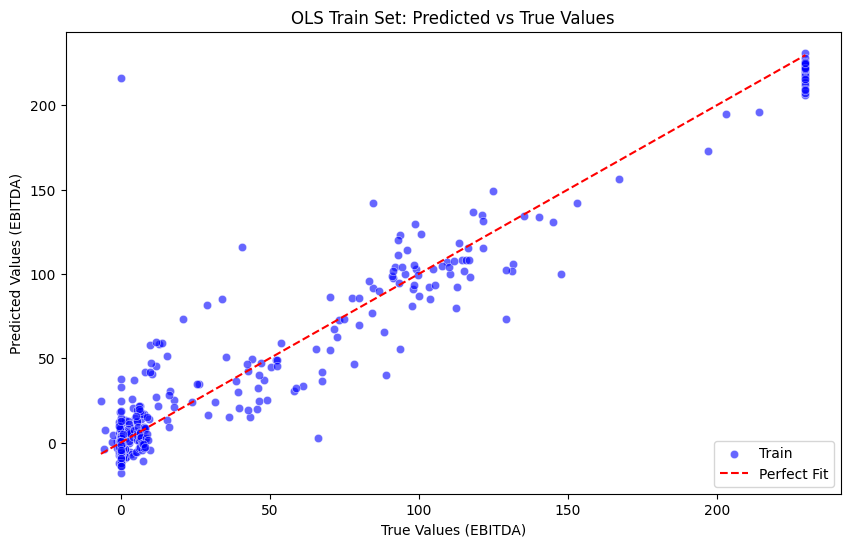

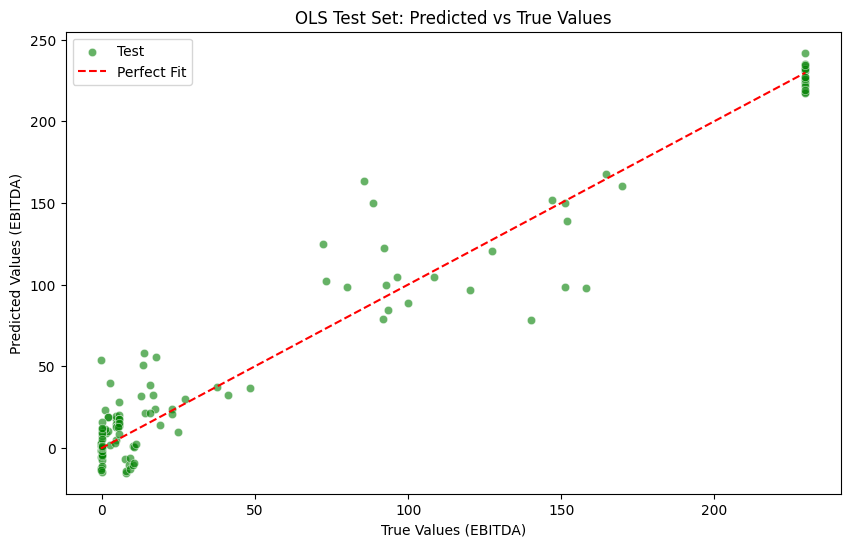

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot result of training set
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_train, y=y_pred_train_ols, color='blue', label='Train', alpha=0.6)

plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label="Perfect Fit")

plt.title('OLS Train Set: Predicted vs True Values')
plt.xlabel('True Values (EBITDA)')
plt.ylabel('Predicted Values (EBITDA)')
plt.legend()
plt.show()

# plot result of testing set
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred_test_ols, color='green', label='Test', alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Fit")

plt.title('OLS Test Set: Predicted vs True Values')
plt.xlabel('True Values (EBITDA)')
plt.ylabel('Predicted Values (EBITDA)')
plt.legend()
plt.show()